In [8]:
#Library imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [9]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /Users/ashutoshdinde/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [11]:
# Load the dataset
data = pd.read_csv('/Users/ashutoshdinde/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv')


In [12]:
# Feature Dividation
X = data.drop('Class', axis=1)
y = data['Class']

In [13]:
# Dataset Dividation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Feature Transformation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Handling imbalance dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [17]:
# Model Intialization
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
iso_forest = IsolationForest(contamination=0.01)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

In [18]:
# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01)

In [19]:
# Step 3: Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression
[[55424  1440]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy: 0.9745795442575752


In [21]:
# Predict and evaluate Decision Tree
y_pred_dec_tree = dec_tree.predict(X_test)
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dec_tree))
print(classification_report(y_test, y_pred_dec_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))


Decision Tree
[[56745   119]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.78      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.997524665566518


In [22]:

# Predict and evaluate Random Forest
y_pred_rand_forest = rand_forest.predict(X_test)
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rand_forest))
print(classification_report(y_test, y_pred_rand_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))

Random Forest
[[56856     8]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995786664794073


In [23]:

# Predict and evaluate Isolation Forest
y_pred_iso_forest = iso_forest.predict(X_test)
y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)  # Convert to 0 and 1
print("Isolation Forest")
print(confusion_matrix(y_test, y_pred_iso_forest))
print(classification_report(y_test, y_pred_iso_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_iso_forest))

Isolation Forest
[[56850    14]
 [   95     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.18      0.03      0.05        98

    accuracy                           1.00     56962
   macro avg       0.59      0.52      0.53     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9980864435939749


In [24]:

# Predict and evaluate Local Outlier Factor
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = np.where(y_pred_lof == 1, 0, 1)  # Convert to 0 and 1
print("Local Outlier Factor")
print(confusion_matrix(y_test, y_pred_lof))
print(classification_report(y_test, y_pred_lof))
print("Accuracy:", accuracy_score(y_test, y_pred_lof))


Local Outlier Factor
[[56302   562]
 [   90     8]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.01      0.08      0.02        98

    accuracy                           0.99     56962
   macro avg       0.51      0.54      0.51     56962
weighted avg       1.00      0.99      0.99     56962

Accuracy: 0.9885537726905657


In [25]:
# Step 4: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

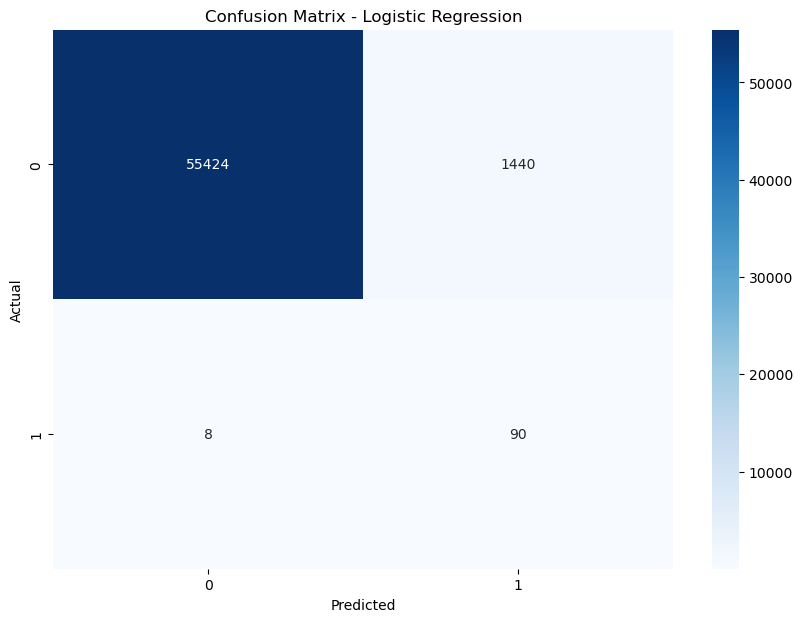

In [26]:
# Confusion matrix heatmap for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
